In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

sns.set(style="darkgrid")
rng = np.random.default_rng(seed=None)

# In case we need many colors
palette = sns.color_palette(cc.glasbey, n_colors=54)

# Data Processing

Import the merged training data.

In [ ]:
X = pd.read_csv('../data/merged_train.csv') 
    # null values occur for missing holiday names (if there is no holiday happening)
    # or for missing boolean value for 'transferred' (if there is no holiday happening)

/var/folders/26/840b8l353yv58xh3z45hs1tc0000gn/T/ipykernel_63827/1350184337.py:1: DtypeWarning: Columns (14,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('../data/merged_train.csv')


Here we:

(1) break the data down by store number in a dictionary `store_num` with integer keys.

(2) make lists containing `store_numbers`, `store_type`, and `store_cluster` for all 54 stores in order.

In [43]:
# Create a dictionary separating data by store number
store_numbers = [ i for i in range(1,55)]
store_num = {}

for i in store_numbers:
    store_num[i] = X[ X.store_nbr == i ]

# Create lists to track store type and cluster (use to hue scatter plots)
store_type = [ store_num[i].type.unique()[0] for i in store_numbers ]
store_cluster = [store_num[i].cluster.unique()[0] for i in store_numbers]

### August Data

Here we focus solely on data for August.

In [95]:
aug_X = X[ X.month == 8 ]

aug_store_num = {}

for i in store_numbers:
    aug_store_num[i] = aug_X[ aug_X.store_nbr == i ]

### Sample Stores

Instead of plotting all 54 stores or a selection of random stores, we choose one store of each type, using the observation from 'Mean sales by store' section, to ensure the stores are different enough, and representative of their store types.

In [146]:
sample_stores = [49, 39, 12, 27, 36]
sample_stores_colors = ['m','orange','g','r','b']
sample_stores_type = ['A', 'B', 'C', 'D', 'E']

# Data Analysis

### Oil prices over time

For the purposes of predicting sales, the only thing of note here is that the oil prices seem to comfortably lie in the $40-50$ range. However, out oil data includes oil prices for the testing set, so we have no use for this.

Another observation: oil price seems to have a degree of seasonality, with seasons being around 2 months long.

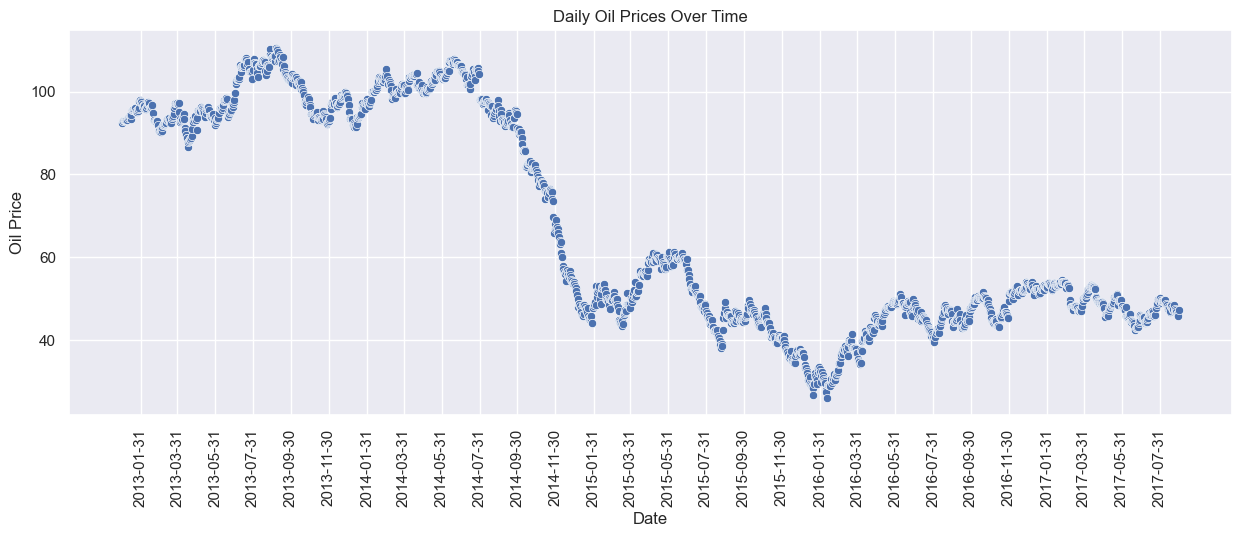

In [149]:
oil_over_time()

### Mean sales by store

The "store type" has some effect on sales.
-  `type=A` stores by far have the most sales. 
- `type=B` stores most commonly have sales around $400\pm 100$.
- `type=C` stores most commonly have sales around $200\pm 100$.
- `type=D` stores exhibit the most variance in terms of mean sales.
- `type=E` stores *all* have sales around $310$.

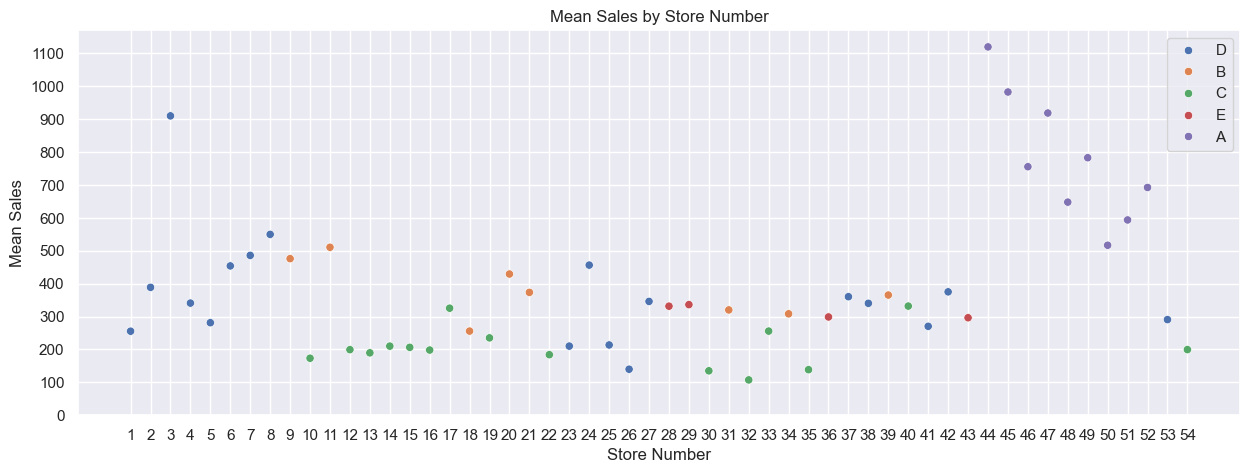

In [ ]:
mean_sales_by_store()   # hue is by store type  

type
A    788.797384
B    378.277356
C    206.984391
D    371.776113
E    313.272015
Name: sales, dtype: float64


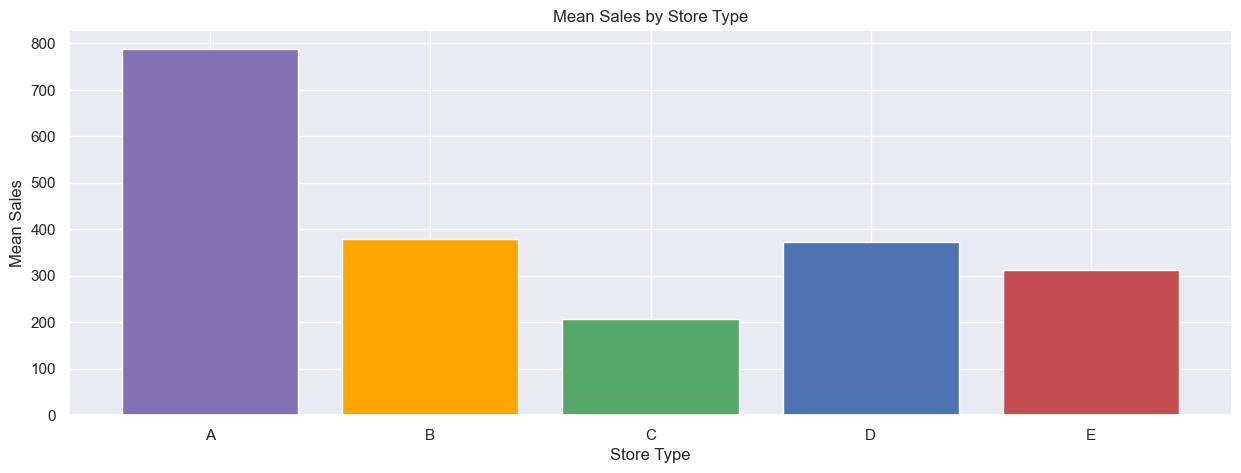

In [45]:
print(X.groupby('type').sales.mean())
mean_sales_by_store_type()

### August sales by store

- In general, the August mean sales seem to more or less match the yearly mean sales.
- For all store_types except E, the sales in August are slightly lower than average.

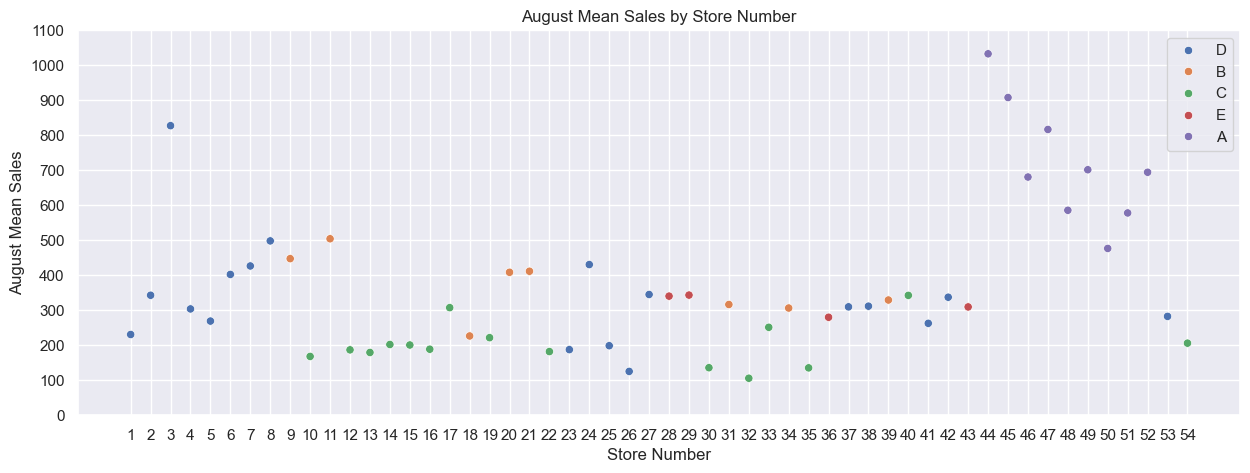

In [101]:
aug_mean_sales_by_store()

type
A    722.045383
B    366.003198
C    201.786095
D    339.778541
E    315.163309
Name: sales, dtype: float64


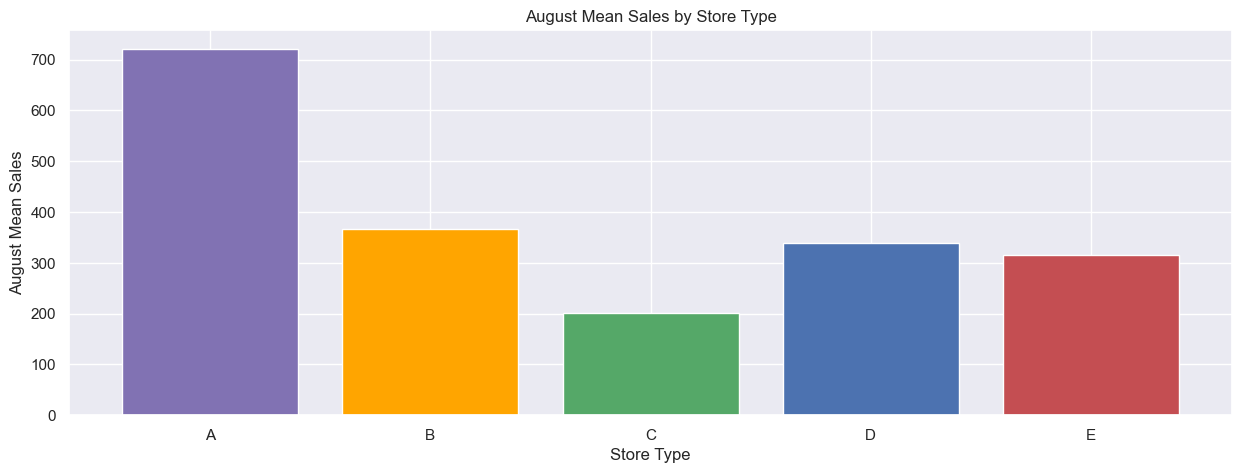

In [100]:
print(aug_X.groupby('type').sales.mean())
aug_mean_sales_by_store_type()

### Transactions vs. Sales

For our sample stores, we plot total transactions against total sales for each day. Although it's not completely clear exactly what `transaction` is tracking, we expected it to be positively correlated with sales. 

Interestingly, most of the sample stores seem to be *two* best fit lines

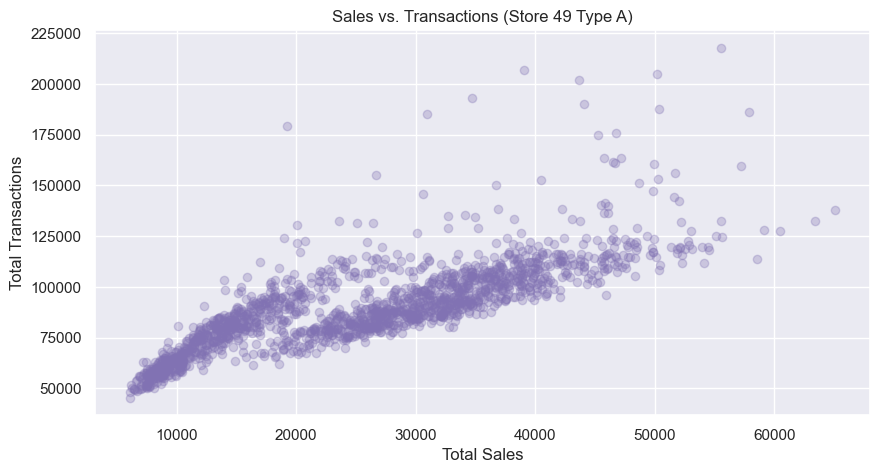

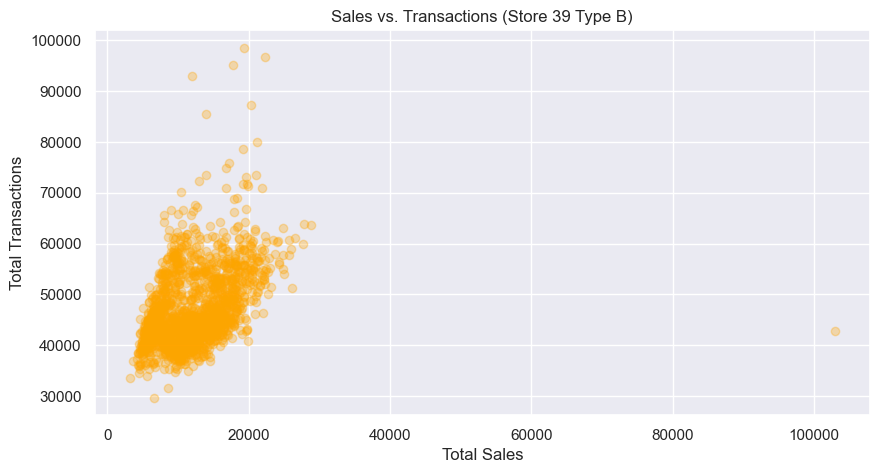

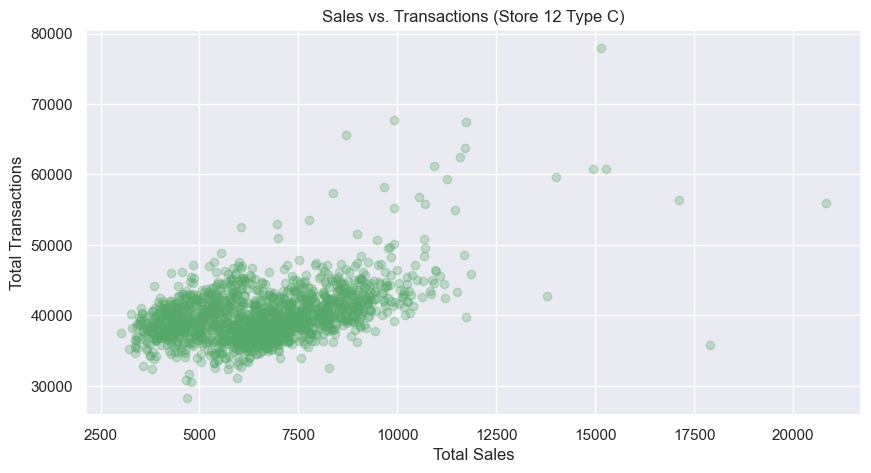

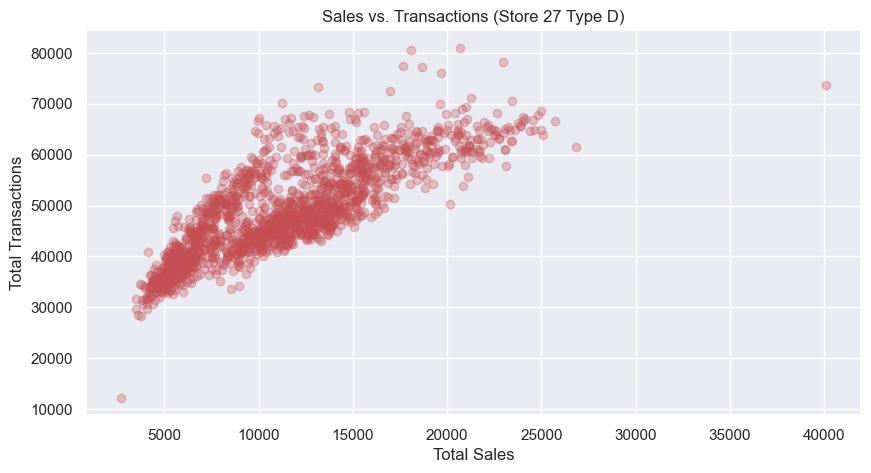

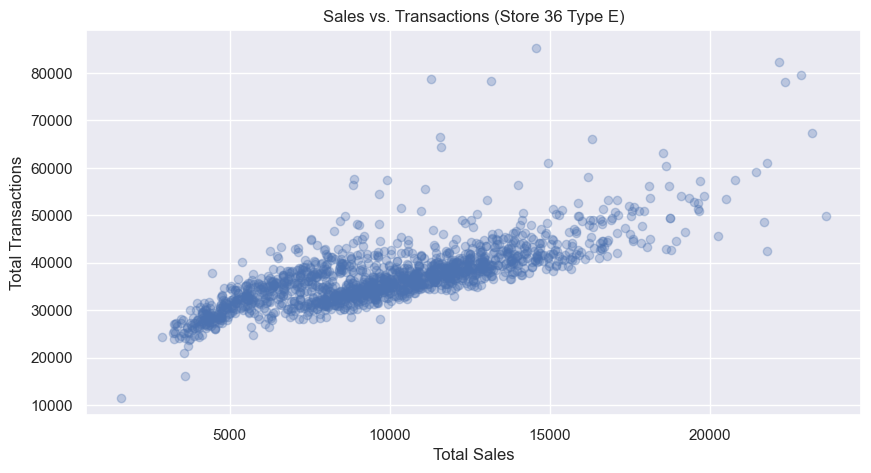

In [ ]:
sample_sales_vs_transactions()

### Oil vs. Sales

### Promotions vs. Sales

# Functions used to generate plots

### Mean Sales by Store Number

In [ ]:
def mean_sales_by_store():
    mean_sales = [store_num[i].sales.mean() for i in store_numbers]

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    sns.scatterplot(x=store_numbers, y=mean_sales, hue=store_type)

    # Format title and axes
    plt.title('Mean Sales by Store Number')
    plt.xlabel('Store Number')
    plt.ylabel('Mean Sales')

    plt.xticks(ticks=store_numbers, labels=store_numbers)
    plt.yticks(ticks=[100*i for i in range(12)], labels=[100*i for i in range(12)])

    # Display the plot
    plt.show()

### Mean Sales by Store Type

In [ ]:
def mean_sales_by_store_type():

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    plt.bar(x=X.groupby('type').sales.mean().index,
            height=X.groupby('type').sales.mean().values,
            color=['m','orange','g','b','r'])

    # Format title and axes
    plt.title('Mean Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Mean Sales')

    # Display the plot
    plt.show()

### August Mean Sales by Store Number

In [92]:
def aug_mean_sales_by_store():
    aug_mean_sales = [aug_store_num[i].sales.mean() for i in store_numbers]

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    sns.scatterplot(x=store_numbers, y=aug_mean_sales, hue=store_type)

    # Format title and axes
    plt.title('August Mean Sales by Store Number')
    plt.xlabel('Store Number')
    plt.ylabel('August Mean Sales')

    plt.xticks(ticks=store_numbers, labels=store_numbers)
    plt.yticks(ticks=[100*i for i in range(12)], labels=[100*i for i in range(12)])

    # Display the plot
    plt.show()

### August Mean Sales by Store Type

In [98]:
def aug_mean_sales_by_store_type():

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    plt.bar(x=aug_X.groupby('type').sales.mean().index,
            height=aug_X.groupby('type').sales.mean().values,
            color=['m','orange','g','b','r'])

    # Format title and axes
    plt.title('August Mean Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('August Mean Sales')

    # Display the plot
    plt.show()

### Sales vs. Transaction for Sample Stores

In [148]:
def sample_sales_vs_transactions():
    for i in sample_stores:
        j = sample_stores.index(i)
        
        fig = plt.figure(figsize=(10,5))

        plt.scatter(store_num[i].groupby('date').sales.sum(),
                    store_num[i].groupby('date').transactions.sum(),
                    color=sample_stores_colors[j], 
                    alpha=.3)

        plt.title(f'Sales vs. Transactions (Store {i} Type {sample_stores_type[j]})')
        plt.xlabel('Total Sales')
        plt.ylabel('Total Transactions')


### Oil prices over time

In [84]:
def oil_over_time():
    # cleaning oil, copied from Cleaning notebook
    oil = pd.read_csv('../data/oil.csv')
    oil = oil.rename({'dcoilwtico': 'oil'}, axis=1)
    oil.iloc[0,1] = 92.485   
    date_range = pd.date_range(start='1/1/2013', end='8/31/2017',freq='D')
    dates = pd.DataFrame(date_range, columns=['date'])
    oil['date'] = pd.to_datetime( oil['date'] )
    oil = dates.merge(oil,how='left', on='date')
    oil['oil'] = oil['oil'].interpolate()
    
    
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=oil.date, y=oil.oil)

    plt.title('Daily Oil Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Oil Price')

    date_range_2M = pd.date_range(start='1/1/2013', end='8/31/2017',freq='2ME')
    
    plt.xticks(ticks=date_range_2M,rotation=90)
        
    plt.show()